Import libraries

In [2]:
import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Conv3D,  MaxPooling2D, Flatten, Dense,UpSampling2D,UpSampling3D, ReLU, LeakyReLU, BatchNormalization, Add, Concatenate

Functions

In [3]:
msel = tf.keras.losses.MeanSquaredError()

def mse(vref, vcmp):

    if np.iscomplexobj(vref) or np.iscomplexobj(vcmp):
        dtype = np.complex128
    else:
        dtype = np.float64
    r = np.asarray(vref, dtype=dtype).ravel()
    c = np.asarray(vcmp, dtype=dtype).ravel()
    return np.mean(np.abs(r - c)**2)

def snr(vref, vcmp):

    dv = np.var(vref)
    with np.errstate(divide='ignore'):
        rt = dv / mse(vref, vcmp)
    return 10.0 * np.log10(rt)


def log10_(x):
  numerator = K.log(x)
  denominator = K.log(K.constant(10, dtype=numerator.dtype))
  return numerator / denominator

def PSNR(y_true, y_pred):
  max_pixel = y_true.max()
  return 10.0 * log10_(  (max_pixel) / msel(y_true,y_pred)   )

Upload seismic data

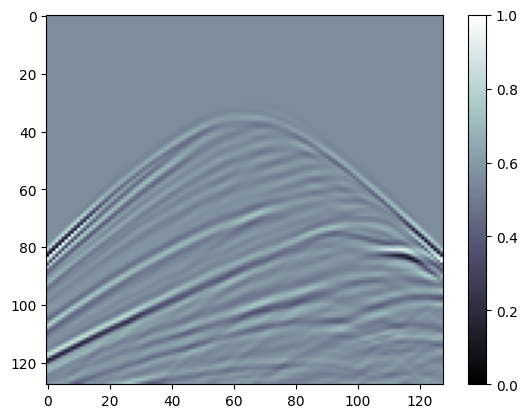

In [28]:
Data = np.load('data/data_seismic_land_25m_16shots.npy')

plt.figure()
plt.imshow(Data[:,:,5],aspect='auto',cmap='bone')
plt.colorbar()

In [29]:
del_shots = [3,5,7,10,12]
sam_shots = [0,1,2,4,6,8,9,11,13,14,15]

In [30]:
xin = Data[np.newaxis,:,:,sam_shots]
xin.shape

(1, 128, 128, 11)

CNN Model

In [31]:
def l_relu_bn(inputs):
    lrelu = LeakyReLU()(inputs)
    bn = BatchNormalization()(lrelu)
    return bn


def buildmodel_CNN():

  filter_size = 2*(5,)

  input_img = keras.Input(shape=(128, 128, len(sam_shots)))

  c1a = Conv2D(64, filter_size, padding='same',use_bias=False)(input_img)
  c1 = l_relu_bn(c1a)

  c2a = Conv2D(32, filter_size, padding='same',use_bias=False)(c1)
  c2 = l_relu_bn(c1a)

  c3a = Conv2D(32, filter_size, padding='same',use_bias=False)(c2)
  c3 = l_relu_bn(c3a)

  c4a = Conv2D(32, filter_size, padding='same',use_bias=False)(c3)
  c4 = l_relu_bn(c4a)

  c5a = Conv2D(32, filter_size, padding='same',use_bias=False)(c4)
  c5 = l_relu_bn(c5a)

  c6a = Conv2D(32, filter_size, padding='same',use_bias=False)(c5)
  c6 = l_relu_bn(c6a)

  c7a = Conv2D(32, filter_size, padding='same',use_bias=False)(c6)
  c7 = l_relu_bn(c7a)

  c8a = Conv2D(32, filter_size, padding='same',use_bias=False)(c7)
  c8 = l_relu_bn(c8a)

  c9a = Conv2D(32, filter_size, padding='same',use_bias=False)(c8)
  c9 = l_relu_bn(c7a)

  c10a = Conv2D(32, filter_size, padding='same',use_bias=False)(c9)
  c10 = l_relu_bn(c10a)

  c11a = Conv2D(32, filter_size, padding='same',use_bias=False)(c10)
  c11 = l_relu_bn(c11a)

  c12a = Conv2D(32, filter_size, padding='same',use_bias=False)(c11)
  c12 = l_relu_bn(c12a)

  c13a = Conv2D(32, filter_size, padding='same',use_bias=False)(c12)
  c13 = l_relu_bn(c13a)

  c14a = Conv2D(32, filter_size, padding='same',use_bias=False)(c13)
  c14 = l_relu_bn(c14a)

  c15a = Conv2D(32, filter_size, padding='same',use_bias=False)(c14)
  c15 = l_relu_bn(c15a)

  c16a = Conv2D(32, filter_size, padding='same',use_bias=False)(c15)
  c16 = l_relu_bn(c16a)

  c17a = Conv2D(16, filter_size, activation='sigmoid',padding='same')(c16)
  x = Conv2D(11, filter_size, activation='sigmoid',padding='same')(c17a)
  model = keras.Model(input_img, x)

  return model

model = buildmodel_CNN()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 11)]    0         
                                                                 
 conv2d_87 (Conv2D)          (None, 128, 128, 64)      17600     
                                                                 
 leaky_re_lu_81 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_81 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_89 (Conv2D)          (None, 128, 128, 32)      51200     
                                                                 
 leaky_re_lu_82 (LeakyReLU)  (None, 128, 128, 32)      0         
                                                           

Training

In [32]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model = buildmodel_CNN()
model.compile(loss='mse', optimizer=opt)

history = model.fit(x = xin,
          y = xin,
          epochs=3000,
          verbose=1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
1/1 [==============================] - 0s 31ms/step - loss: 5.5282e-05
Epoch 502/3000
1/1 [==============================] - 0s 27ms/step - loss: 5.5984e-05
Epoch 503/3000
1/1 [==============================] - 0s 33ms/step - loss: 5.6558e-05
Epoch 504/3000
1/1 [==============================] - 0s 27ms/step - loss: 5.5168e-05
Epoch 505/3000
1/1 [==============================] - 0s 30ms/step - loss: 5.3645e-05
Epoch 506/3000
1/1 [==============================] - 0s 25ms/step - loss: 5.2801e-05
Epoch 507/3000
1/1 [==============================] - 0s 29ms/step - loss: 5.3133e-05
Epoch 508/3000
1/1 [==============================] - 0s 27ms/step - loss: 5.4097e-05
Epoch 509/3000
1/1 [==============================] - 0s 30ms/step - loss: 5.4106e-05
Epoch 510/3000
1/1 [==============================] - 0s 26ms/step - loss: 5.3085e-05
Epoch 511/3000
1/1 [==============================] - 0s 33ms/step - loss: 5.2039e-05
Ep

Reconstruction

In [33]:
output = model.layers[-2].output
model_pred = keras.Model(inputs = model.input, outputs = output)
shots_pred = model_pred.predict(xin)
x_reconstructed = shots_pred.squeeze()

1/1 [==============================] - 0s 301ms/step


Results

Shot -> 3


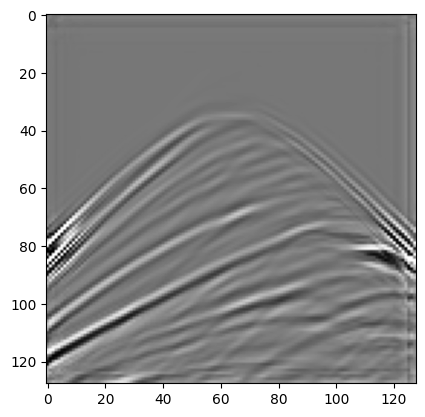

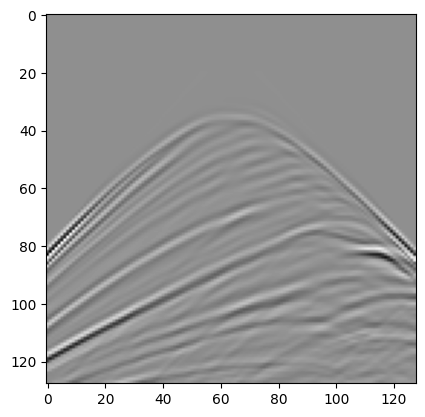

     MSE 0.014294360050319845
     PSNR 18.44835
     SNR -5.94117
     SSIM 0.82996
Shot -> 5


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


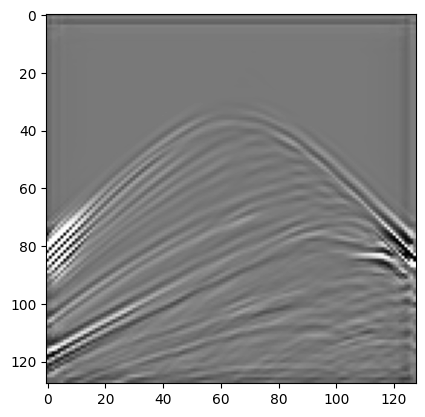

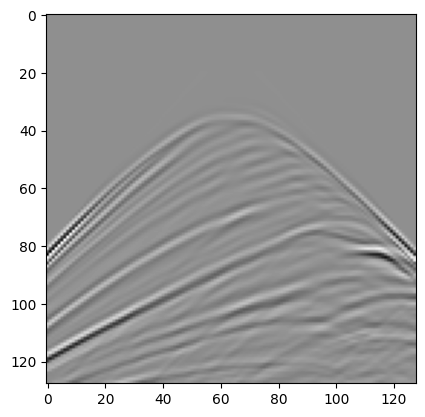

     MSE 0.019506677009872186
     PSNR 17.09817
     SNR -7.29136
     SSIM 0.52511
Shot -> 7


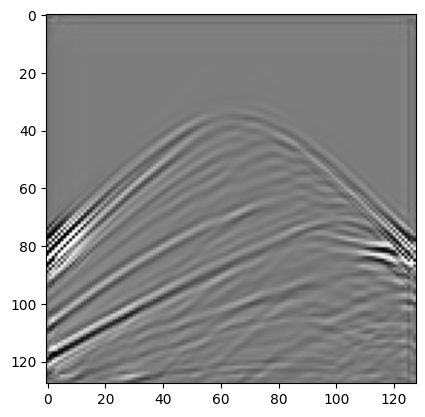

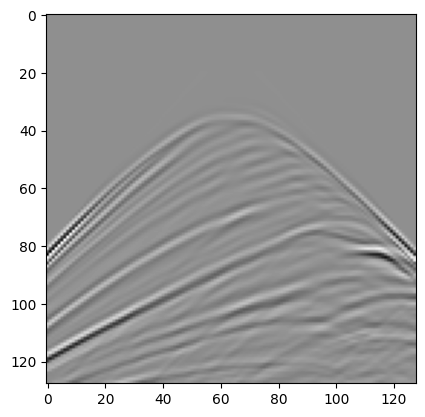

     MSE 0.01354069616115407
     PSNR 18.68359
     SNR -5.70594
     SSIM 0.68743
Shot -> 10


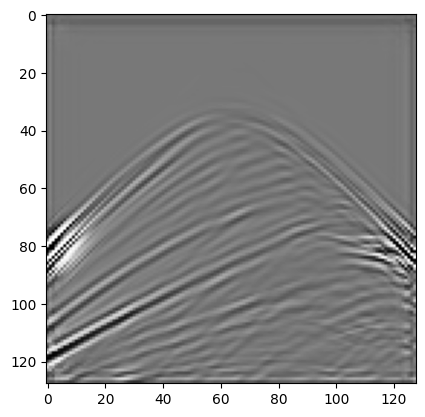

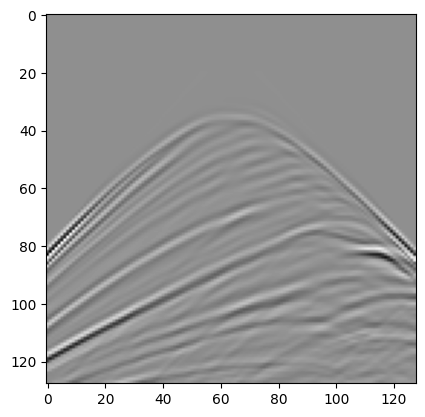

     MSE 0.016715683600508617
     PSNR 17.76876
     SNR -6.62077
     SSIM 0.72513
Shot -> 12


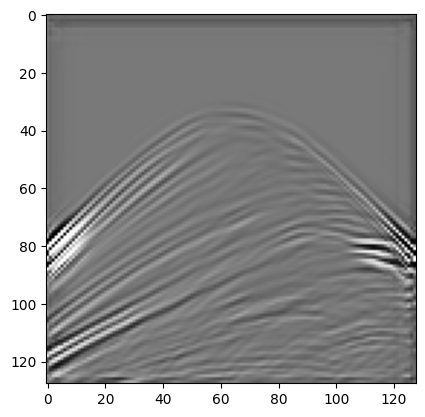

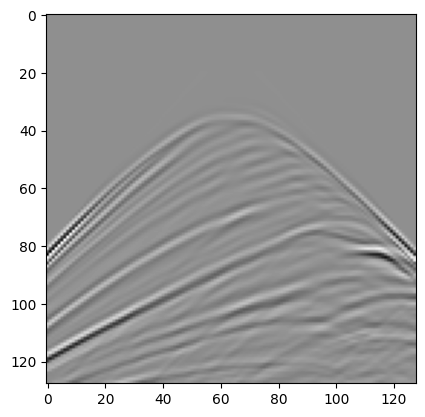

     MSE 0.018720061782205998
     PSNR 17.27693
     SNR -7.1126
     SSIM 0.60766


In [34]:
for i in range(len(del_shots)):
    print('Shot ->', del_shots[i])
    plt.imshow(x_reconstructed[:,:,del_shots[i]],cmap='gray')
    plt.show()
    plt.imshow(Data[:,:,del_shots[i]],cmap='gray')
    plt.show()
    print('     MSE', mse(Data[:,:,del_shots[i]], x_reconstructed[:,:,del_shots[i]]))
    print('     PSNR', np.round(PSNR(Data[:,:,del_shots[i]], x_reconstructed[:,:,del_shots[i]]).numpy(),5))
    print('     SNR', np.round(snr(Data[:,:,del_shots[i]], x_reconstructed[:,:,del_shots[i]]),5))
    print('     SSIM', np.round(ssim(Data[:,:,del_shots[i]],  x_reconstructed[:,:,del_shots[i]]),5))

Export reconstructed data

In [35]:
np.save('seismic_land_reconstructed_CNN_IL.npy', x_reconstructed)